In [1]:
from itertools import groupby

import pandas
data = pandas.read_csv('data/brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [2]:
data.shape

(40, 8)

In [3]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [4]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [5]:
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

In [7]:
data[data['Gender'] == 'Female']['VIQ'].mean()
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [8]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [10]:
import pandas
import pandas.plotting
from statsmodels.formula.api import ols

data = pandas.read_csv('data/brain_size.csv', sep=';', na_values='.')

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

#Here we don't need to define a contrast, as we are testing a single coefficient of our model, not a combination of coefficients.
#However, defining a contrast, which would then be a 'unit contrast', will give us the same results.

print(model.f_test([0,1,0,0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Thu, 18 Sep 2025   Prob (F-statistic):             0.0184
Time:                        14:31:23   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [13]:
import pandas as pd
# Reading the CSV file
df = pd.read_csv('data/iris.csv')

# Printing top 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.shape

(150, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
name            0
dtype: int64

In [19]:
data = df.drop_duplicates(subset='name',)
data

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [20]:
df.value_counts("name")

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

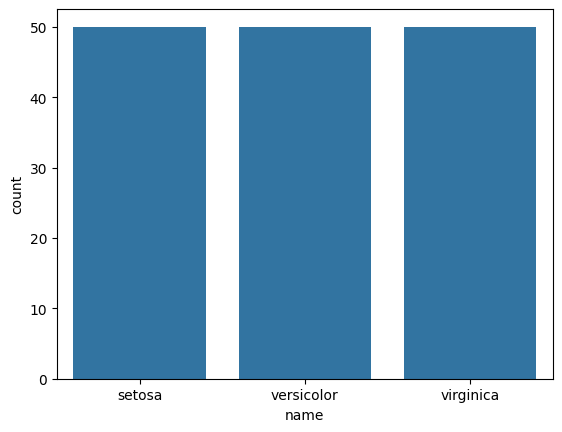

In [23]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= "name", data=df, )
plt.show()

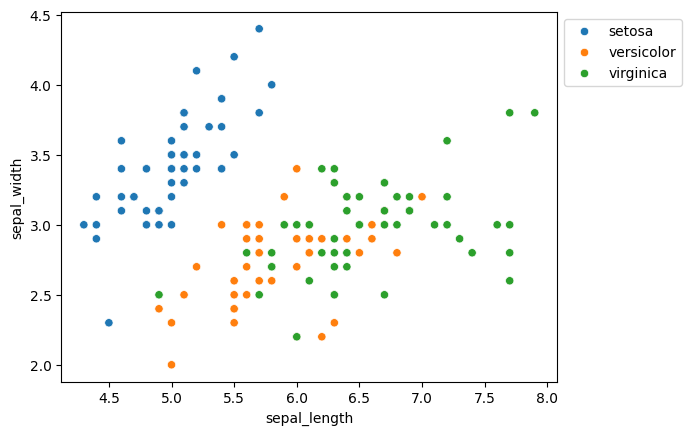

In [24]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="sepal_length", y="sepal_width", hue="name", data=df, )

# Placing Legend Outside the Figure
plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2)
plt.show()

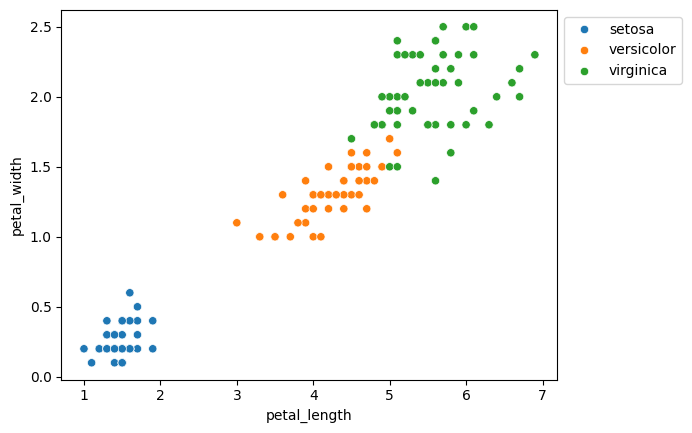

In [25]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="petal_length", y="petal_width", hue="name", data=df, )

# Placing Legend Outside the Figure
plt.legend(bbox_to_anchor=(1.0, 1.0), loc=2)
plt.show()

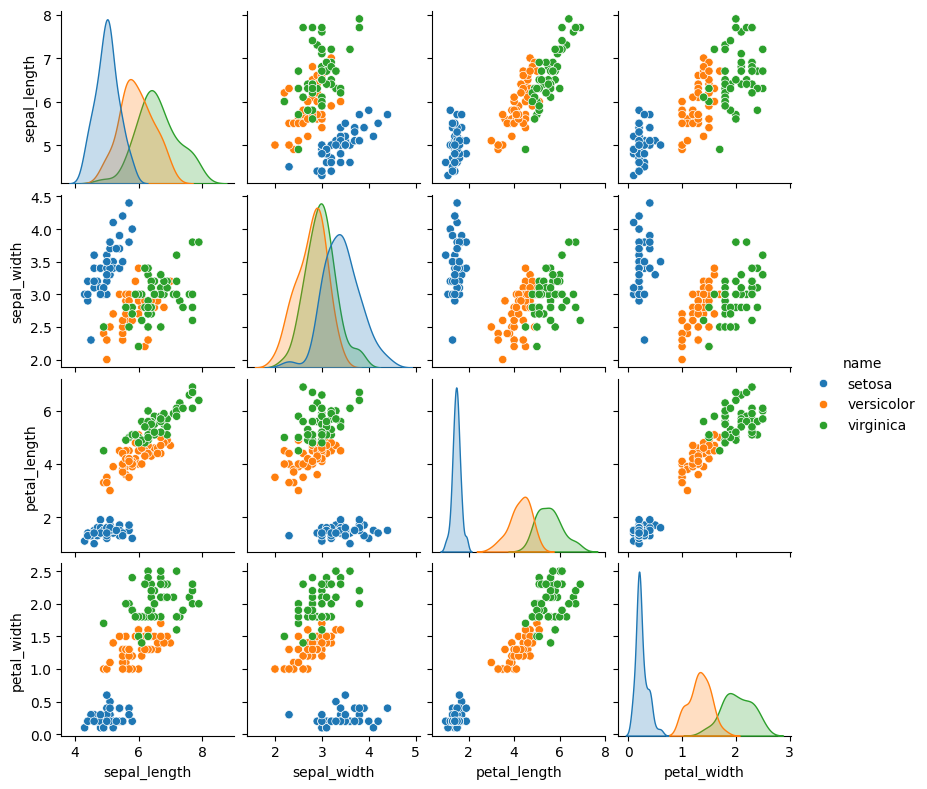

In [26]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="name", height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

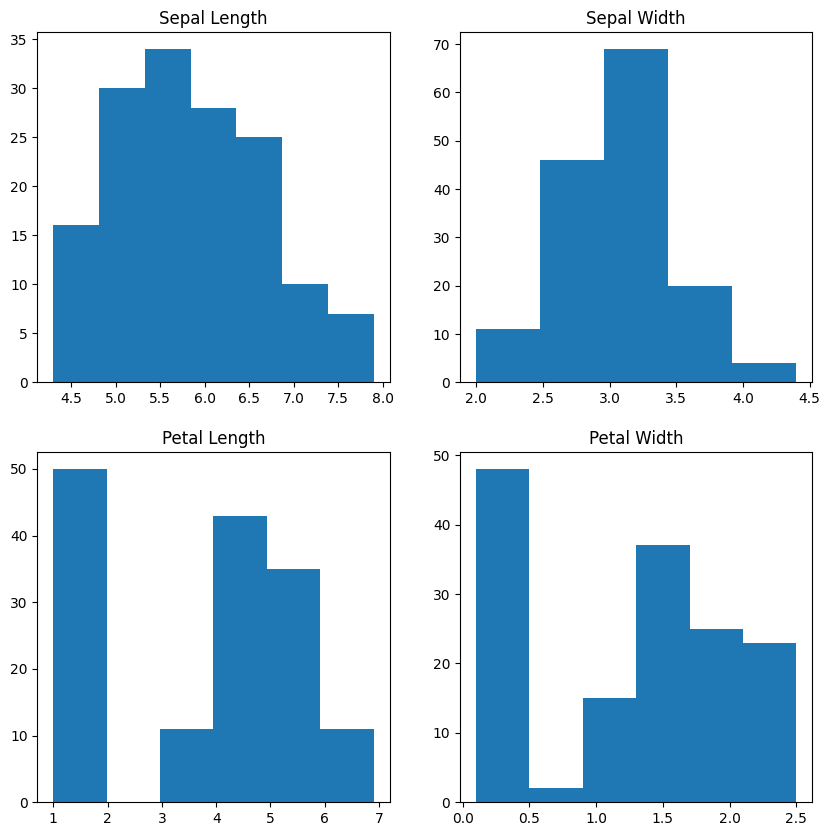

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes[0][0].set_title('Sepal Length')
axes[0][0].hist(df['sepal_length'], bins=7)

axes[0][1].set_title('Sepal Width')
axes[0][1].hist(df['sepal_width'], bins=5)

axes[1][0].set_title('Petal Length')
axes[1][0].hist(df['petal_length'], bins=6)

axes[1][1].set_title('Petal Width')
axes[1][1].hist(df['petal_width'], bins=6)

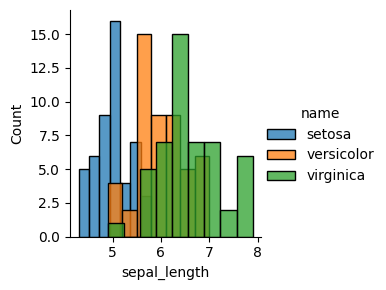

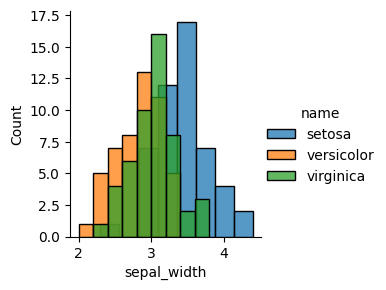

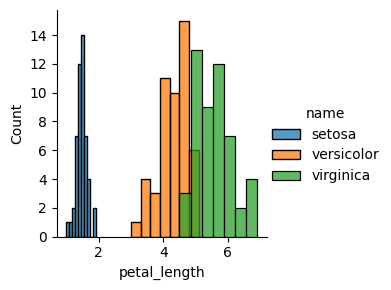

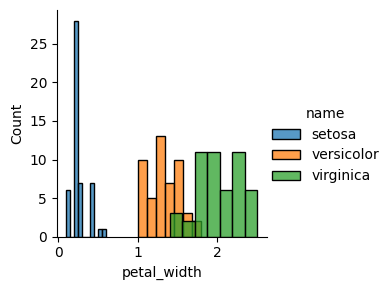

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.FacetGrid(df, hue="name")
plot.map(sns.histplot, "sepal_length").add_legend()

plot = sns.FacetGrid(df, hue="name")
plot.map(sns.histplot, "sepal_width").add_legend()

plot = sns.FacetGrid(df, hue="name")
plot.map(sns.histplot, "petal_length").add_legend()

plot = sns.FacetGrid(df, hue="name")
plot.map(sns.histplot, "petal_width").add_legend()

plt.show()


In [29]:
data.corr(numeric_only=True, method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.999226,0.795795,0.643817
sepal_width,-0.999226,1.000000,-0.818999,-0.673417
petal_length,0.795795,-0.818999,1.000000,0.975713
petal_width,0.643817,-0.673417,0.975713,1.000000


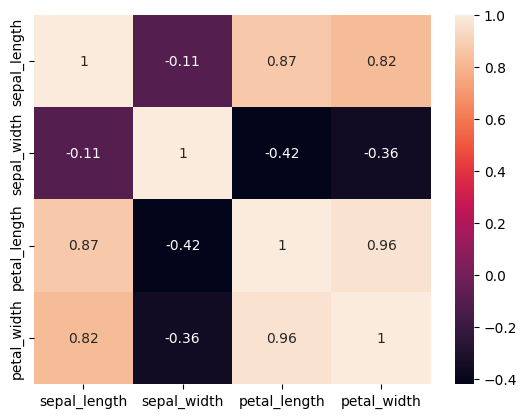

In [30]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True, method='pearson'), annot=True);

plt.show()

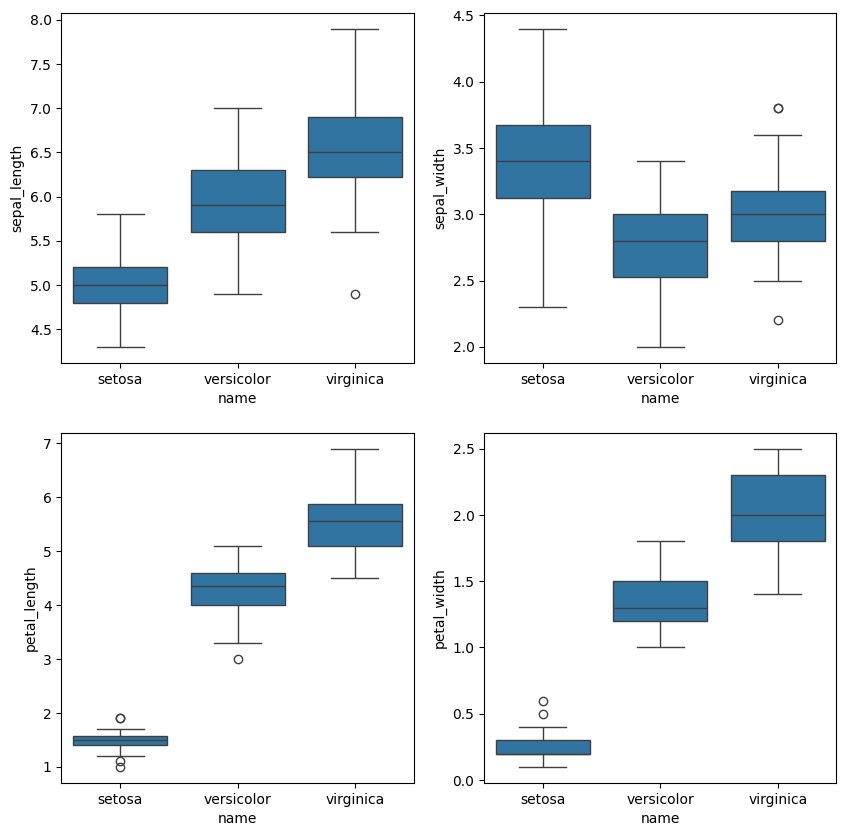

In [31]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
    sns.boxplot(x="name", y=y, data=df)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified grid position
plt.subplot(2,2,1)
graph('sepal_length')

plt.subplot(2,2,2)
graph('sepal_width')

plt.subplot(2,2,3)
graph('petal_length')

plt.subplot(2,2,4)
graph('petal_width')

plt.show()
